# Machine Learning For NLP : Prediction of Sex

## Table des matières

## 0. Imports et Packages

In [1]:
import numpy as np
import pandas as pd
import re
from preprocessing import cleaning_pipeline, concatenate_column_names
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("transcriptions_with_sex.csv")
name_data = pd.read_csv("firstname_with_sex.csv", sep=";")

In [3]:
name_data.columns = ["prénom", "nombre hommes", "nombre femmes"]
name_data.head()

,prénom,nombre hommes,nombre femmes
0,marie,10145,2390322
1,jean,1869615,6476
2,pierre,1475841,5047
3,jeanne,1765,1097397
4,françois,1089009,5951


## 1. Nettoyage des données

In [4]:
column_to_extract = "prediction"
columns_to_drop = ["subject_line", "groundtruth"]
cleaned_df = cleaning_pipeline(df, name_data, column_to_extract, columns_to_drop)

In [5]:
cleaned_df = cleaned_df[cleaned_df["sex"] != "ambigu"]

In [6]:
cleaned_df.sample(5)

,sex,état_civil,prénom,éducation,profession,date_naissance,employeur,relation,nom,lieux_naissance,nombre hommes,nombre femmes
102,homme,NaN,jean,NaN,NaN,53,NaN,NaN,Pichard,P,1869615.0,6476.0
99,femme,NaN,marie,NaN,id,1884,NaN,ch,Peynot,Colinet,10145.0,2390322.0
192,homme,NaN,antoine,NaN,S,11,NaN,NaN,Germain,id,536089.0,2067.0
178,femme,v,marguerite,NaN,NaN,28,NaN,fomme,Vacter,P,1441.0,813859.0
206,homme,NaN,denis,NaN,NaN,50,NaN,chef,Brulier,agens,47962.0,172.0


In [7]:
cleaned_df.date_naissance.value_counts()

55        6
17        5
21        5
12        5
27        5
         ..
644ann    1
Parnen    1
42        1
il        1
1849      1
Name: date_naissance, Length: 133, dtype: int64

In [8]:
cleaned_df.éducation.value_counts()

m    3
Name: éducation, dtype: int64

In [9]:
# Compter le nombre de NaN par colonne
na_counts = cleaned_df.isna().sum()

# Afficher le nombre de NaN par colonne
print(na_counts)

sex                  0
état_civil         196
prénom               0
éducation          229
profession         173
date_naissance       1
employeur          197
relation            84
nom                 12
lieux_naissance     63
nombre hommes       28
nombre femmes       28
dtype: int64


In [10]:
# Séparation des features (X) et de la cible (y)
X = cleaned_df.drop("sex", axis=1)  # Features (toutes les colonnes sauf 'sex')
y = cleaned_df["sex"]  # Cible (colonne 'sex')

# Split train/test avec stratification sur la colonne 'sex'
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
X_train

,état_civil,prénom,éducation,profession,date_naissance,employeur,relation,nom,lieux_naissance,nombre hommes,nombre femmes
137,NaN,elisabeth,NaN,NaN,28,NaN,chef,Gaudiat,NaN,353.0,224969.0
52,NaN,antoine,NaN,Ed,88,NaN,NaN,Lognon,d,536089.0,2067.0
21,NaN,louis,NaN,NaN,6,NaN,NaN,Martin,NaN,750498.0,2720.0
99,NaN,marie,NaN,id,1884,NaN,ch,Peynot,Colinet,10145.0,2390322.0
98,NaN,alphonse,NaN,NaN,2,NaN,enfant,Parent,id,39177.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...
43,NaN,joseph,NaN,NaN,NaN,NaN,epre,Glacher,NaN,897742.0,4246.0
63,NaN,pierre,NaN,NaN,3,NaN,chef,Lacroix,f,1475841.0,5047.0
127,NaN,gervais,NaN,manoeuvre,1891,oabrienson,chef,Joubert,NaN,6108.0,16.0
8,NaN,maria,NaN,id,4,NaN,id,Pouche,d,248.0,52008.0


In [14]:
# Compter le nombre de NaN par colonne
na_counts = X_train.isna().sum()

# Afficher le nombre de NaN par colonne
print(na_counts)

état_civil         157
prénom               0
éducation          183
profession         134
date_naissance       1
employeur          156
relation            66
nom                 10
lieux_naissance     47
nombre hommes       20
nombre femmes       20
dtype: int64


## 2. Statistiques descriptives

### 2.1 Wordcloud sur la fréquence des genres des prénoms

In [15]:
name_data["female_freq"] = name_data["female"] / (name_data["male"] + name_data["female"])

KeyError: 'female'

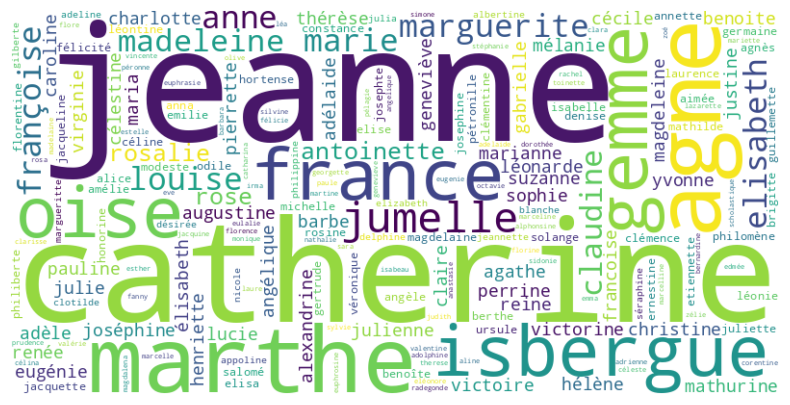

In [ ]:
most_female_name = name_data[name_data["female_freq"] >= 0.5]
all_names = " ".join(most_female_name["firstname"].dropna())
wordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate(all_names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
#plt.title("Nuage de mots des prénoms le plus souvent féminin")
plt.show()

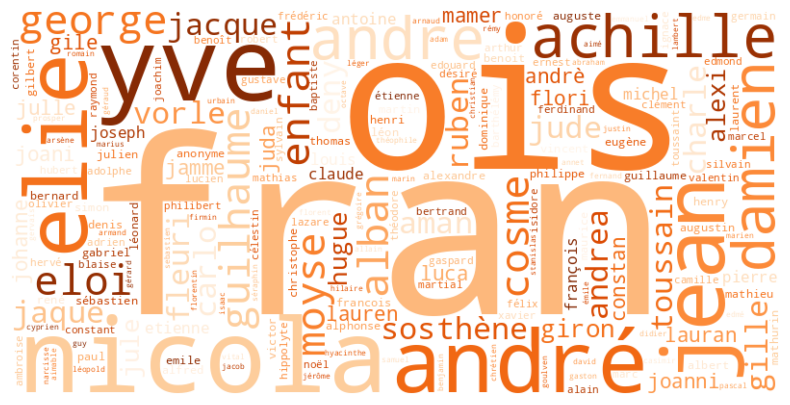

In [ ]:
most_male_name = name_data[name_data["female_freq"] < 0.5]
all_names = " ".join(most_male_name["firstname"].dropna())
colormap = "Oranges"
wordcloud = WordCloud(
    width=800, height=400, background_color="white", colormap=colormap
).generate(all_names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.title("Nuage de mots des prénoms le plus souvent masculin")
plt.show()

### 2.2 Statistiques descriptives sur le données d'entraînements

In [16]:
df_train = X_train.copy()
df_train['target'] = y_train

In [17]:
df_train.shape

(185, 12)

In [18]:
df_train.target.value_counts()

homme    100
femme     85
Name: target, dtype: int64

In [19]:
df_train.état_civil.value_counts()

m            5
V            4
s            3
M            3
C            2
D            2
v            1
me           1
Vitant       1
Ch           1
marnt        1
id           1
marns        1
mère         1
meunicien    1
Name: état_civil, dtype: int64

In [22]:
# df_homme = df_train[df_train['target'] == 'homme']  
# df_femme = df_train[df_train["target"] == "femme"]

# # Définir les paramètres esthétiques seaborn
# sns.set(style="whitegrid")

# # Tracer le graphique avec seaborn
# plt.figure(figsize=(8, 4))

# # # KDE plot pour les hommes
# # sns.histplot(df_homme['age'], bins=20, color='orange', alpha=0.7, kde=True, label='Homme')

# # # KDE plot pour les femmes
# # sns.histplot(df_femme['age'], bins=20, color='green', alpha=0.7, kde=True, label='Femme')

# # Personnalisation du graphique
# plt.title("Répartition de l'âge par sexe")
# plt.xlabel("Âge")
# plt.ylabel("Nombre de personnes")
# plt.legend()

# # Afficher le graphique
# plt.show()

In [23]:
df_train.describe()

,nombre hommes,nombre femmes
count,1.650000e+02,1.650000e+02
mean,4.235951e+05,4.744330e+05
std,6.555187e+05,8.280896e+05
min,1.000000e+00,4.000000e+00
25%,1.223000e+03,2.720000e+03
50%,1.014500e+04,6.476000e+03
75%,7.504980e+05,8.138590e+05
max,1.869615e+06,2.390322e+06


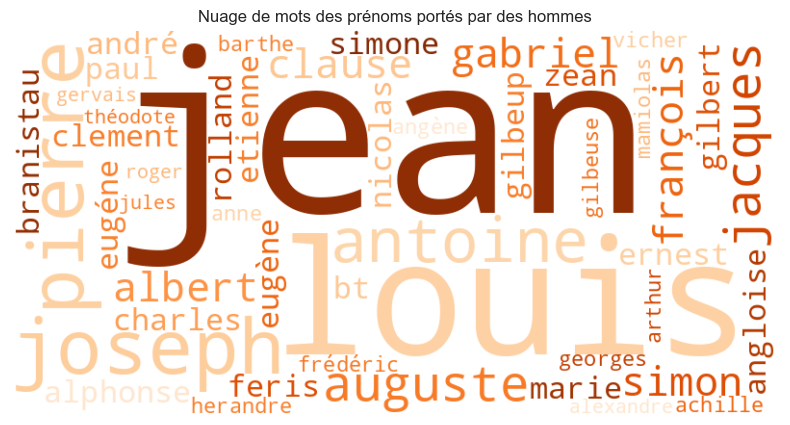

In [25]:
all_names = " ".join(df_homme["prénom"].dropna())
colormap = "Oranges"
wordcloud = WordCloud(
    width=800, height=400, background_color="white", colormap=colormap
).generate(all_names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots des prénoms portés par des hommes")
plt.show()

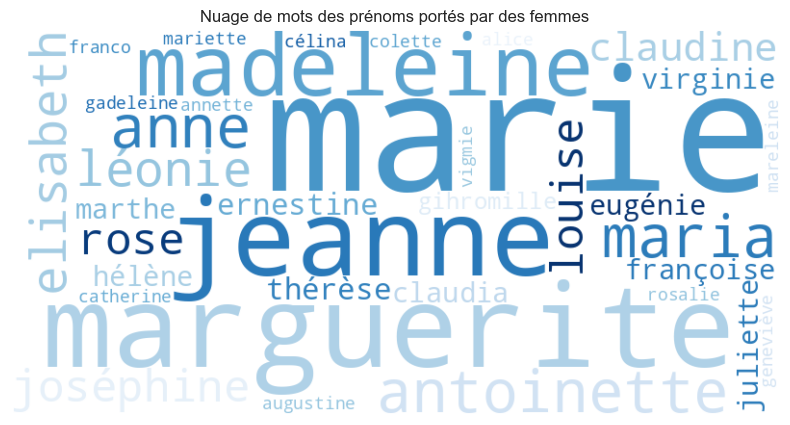

In [26]:
all_names = " ".join(df_femme["prénom"].dropna())
colormap = "Blues"
wordcloud = WordCloud(
    width=800, height=400, background_color="white", colormap=colormap
).generate(all_names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots des prénoms portés par des femmes")
plt.show()

## 3. Preprocessing 

In [27]:
X_train['texte'] = X_train.apply(concatenate_column_names, axis=1)
X_test["texte"] = X_test.apply(concatenate_column_names, axis=1)

/Users/emanieluu/Documents/ENSAE/3A/S2/NLP/nlp_project/ml_for_nlp/preprocessing.py:43: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, value in row.iteritems():
/Users/emanieluu/Documents/ENSAE/3A/S2/NLP/nlp_project/ml_for_nlp/preprocessing.py:43: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, value in row.iteritems():


## 4. Modélisation

In [28]:
from preprocessing import calculate_scores

### 4.1 Modèle naïf

In [32]:
y_predict_train = pd.Series(
    [
        "homme" if male > female else "femme"
        for male, female in zip(X_train["nombre hommes"], X_train["nombre femmes"])
    ]
)

y_predict_test = pd.Series(
    [
        "homme" if male > female else "femme"
        for male, female in zip(X_test["nombre hommes"], X_test["nombre femmes"])
    ]
)

In [33]:
y_predict_train.value_counts()

femme    103
homme     82
dtype: int64

In [34]:
# Calcul des scores pour les prédictions sur l'ensemble d'entraînement (train)
train_scores_df = calculate_scores(y_train, y_predict_train, label="homme")

# Calcul des scores pour les prédictions sur l'ensemble de test (test)
test_scores_df = calculate_scores(y_test, y_predict_test, label="homme")

# Concaténation des dataframes de scores
final_scores_df = pd.concat(
    [train_scores_df, test_scores_df], keys=["Train", "Test"]
)

# Affichage du dataframe des scores
print(final_scores_df)

             Accuracy  Precision  Recall  F1 Score
Train homme  0.902703        1.0    0.82  0.901099
Test  homme  0.936170        1.0    0.88  0.936170


In [35]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset

### 4.2 Modèle : Bert Base Uncased

In [36]:
# Division des données en ensembles d'entraînement et de validation
train_texts = X_train['texte'].tolist()
val_texts = X_test['texte'].tolist()
train_targets = y_train.apply(lambda x: 1 if x == "homme" else 0).tolist()
val_targets = y_test.apply(lambda x: 1 if x == "homme" else 0).tolist()

In [37]:
train_texts

['prénom : elisabeth date_naissance : 28 relation : chef nom : Gaudiat nombre hommes : 353.0 nombre femmes : 224969.0',
 'prénom : antoine profession : Ed date_naissance : 88 nom : Lognon lieux_naissance : d nombre hommes : 536089.0 nombre femmes : 2067.0',
 'prénom : louis date_naissance : 6 nom : Martin nombre hommes : 750498.0 nombre femmes : 2720.0',
 'prénom : marie profession : id date_naissance : 1884 relation : ch nom : Peynot lieux_naissance : Colinet nombre hommes : 10145.0 nombre femmes : 2390322.0',
 'prénom : alphonse date_naissance : 2 relation : enfant nom : Parent lieux_naissance : id nombre hommes : 39177.0 nombre femmes : 183.0',
 'prénom : madeleine profession : d date_naissance : 1909 employeur : d relation : femme nom : Lasne lieux_naissance : Cher nombre hommes : 424.0 nombre femmes : 217939.0',
 'prénom : jean date_naissance : 54 relation : chef nom : Jean nombre hommes : 1869615.0 nombre femmes : 6476.0',
 'prénom : joseph date_naissance : 18 relation : inf lieu

In [20]:
# Initialisation du tokenizer et du modèle BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # 2 labels: male, female

# Tokenisation des données
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

# Création des datasets PyTorch
train_dataset = TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(train_targets)
)
val_dataset = TensorDataset(
    torch.tensor(val_encodings['input_ids']),
    torch.tensor(val_encodings['attention_mask']),
    torch.tensor(val_targets)
)

# Paramètres d'entraînement
batch_size = 16
num_epochs = 3
learning_rate = 2e-5

# Création des dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Configuration de l'optimiseur
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Entraînement du modèle
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}: Average training loss = {avg_train_loss:.4f}")

# Évaluation du modèle sur l'ensemble de validation
model.eval()
val_preds = []
val_true = []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        val_preds.extend(preds)
        val_true.extend(labels.cpu().numpy())

val_accuracy = accuracy_score(val_true, val_preds)
print(f"Validation accuracy: {val_accuracy:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/emanieluu/Library/Python/3.9/lib/python/site-packages/transformers/optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Average training loss = 0.6770
Epoch 2: Average training loss = 0.5374
Epoch 3: Average training loss = 0.2994
Validation accuracy: 0.8571


### 4.3 Modèle : Camembert base

In [21]:
from transformers import CamembertTokenizer, CamembertForSequenceClassification, AdamW

In [22]:
# Initialisation du tokenizer et du modèle CamemBERT
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
model = CamembertForSequenceClassification.from_pretrained('camembert-base', num_labels=2)  # 2 labels: 0 (female), 1 (male)

# Tokenisation des données
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

# Création des datasets PyTorch
train_dataset = TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(train_targets)
)
val_dataset = TensorDataset(
    torch.tensor(val_encodings['input_ids']),
    torch.tensor(val_encodings['attention_mask']),
    torch.tensor(val_targets)
)

# Paramètres d'entraînement
batch_size = 16
num_epochs = 3
learning_rate = 2e-5

# Création des dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Configuration de l'optimiseur
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Entraînement du modèle
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}: Average training loss = {avg_train_loss:.4f}")

# Évaluation du modèle sur l'ensemble de validation
model.eval()
val_preds = []
val_true = []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        val_preds.extend(preds)
        val_true.extend(labels.cpu().numpy())

val_accuracy = accuracy_score(val_true, val_preds)
print(f"Validation accuracy: {val_accuracy:.4f}")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/emanieluu/Library/Python/3.9/lib/python/site-packages/transformers/optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Average training loss = 0.6958
Epoch 2: Average training loss = 0.6741
Epoch 3: Average training loss = 0.5949
Validation accuracy: 0.9184
